In [ ]:
import numpy as np
import pandas as pd
import datetime
import pandas_datareader.data as web

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2020,12,1)

In [ ]:
import fix_yahoo_finance as yf

In [ ]:
# to get data directly from the web

tesla = web.DataReader('TSLA', 'yahoo', start, end)
ford = web.DataReader('F', 'yahoo', start, end)
gm = web.DataReader('GM', 'yahoo', start, end)

In [ ]:
# using append function to join the dataframe

new = tesla.append(ford)
new = tesla.append(ford, ignore_index=True)

In [ ]:
new.head(5)

,High,Low,Open,Close,Volume,Adj Close
0,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
1,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
3,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
4,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001


In [ ]:
# concatinating the open proces of tesla, ford and gm

car_comp = pd.concat([tesla["Open"], gm["Open"], ford["Open"]], axis =1,keys=['TSLA', 'GM', 'F'])

In [ ]:
car_comp = pd.concat([tesla,gm, ford], axis=1, keys=['TSLA', 'GM', 'F'])

In [ ]:
car_comp['TSLA']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001
...,...,...,...,...,...,...
2020-11-24,559.989990,526.200012,540.400024,555.380005,53648500.0,555.380005
2020-11-25,574.000000,545.369995,550.059998,574.000000,48930200.0,574.000000
2020-11-27,598.780029,578.450012,581.159973,585.760010,37561100.0,585.760010


In [ ]:

car_comp = pd.concat([tesla["Open"], gm["Open"], ford["Open"]],keys=['TSLA', 'GM', 'F'])
car_comp.head(5)

      Date      
TSLA  2020-01-02    84.900002
      2020-01-03    88.099998
      2020-01-06    88.094002
      2020-01-07    92.279999
      2020-01-08    94.739998
Name: Open, dtype: float64

In [ ]:
tesla['Returns']=tesla['Close'].pct_change()
tesla.head(5)

,High,Low,Open,Close,Volume,Adj Close,Returns
Date,,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002,NaN
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997,0.029633
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999,0.019255
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996,0.038801
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001,0.049205


In [ ]:
car_comp = car_comp.pct_change(1)
car_comp

      Date      
TSLA  2020-01-02         NaN
      2020-01-03    0.037691
      2020-01-06   -0.000068
      2020-01-07    0.047517
      2020-01-08    0.026658
                      ...   
F     2020-11-24    0.037415
      2020-11-25    0.005465
      2020-11-27   -0.008696
      2020-11-30    0.012061
      2020-12-01   -0.007584
Name: Open, Length: 696, dtype: float64

In [ ]:
tesla['Company'] = 'Tesla'
ford['Company'] = 'Ford'
gm['Company'] = 'GM'

In [ ]:
car_comp = pd.concat([tesla[['Company', "Open"]], gm[['Company',"Open"]], ford[['Company', "Open"]]])
car_comp

,Company,Open
Date,,
2020-01-02,Tesla,84.900002
2020-01-03,Tesla,88.099998
2020-01-06,Tesla,88.094002
2020-01-07,Tesla,92.279999
2020-01-08,Tesla,94.739998
...,...,...
2020-11-24,Ford,9.150000
2020-11-25,Ford,9.200000
2020-11-27,Ford,9.120000


In [ ]:
# merging the dataframe tesla and gm with 'OPEN' column

car_compnew = pd.merge(tesla["Open"], gm["Open"], left_index=True, right_index=True, suffixes=("_tesla", "_gm"), how='inner')
car_compnew

,Open_tesla,Open_gm
Date,,
2020-01-02,84.900002,37.000000
2020-01-03,88.099998,36.730000
2020-01-06,88.094002,35.950001
2020-01-07,92.279999,35.750000
2020-01-08,94.739998,35.040001
...,...,...
2020-11-24,540.400024,45.910000
2020-11-25,550.059998,45.610001
2020-11-27,581.159973,45.349998


In [ ]:
info = pd.DataFrame([['Ford', 'Tesla', 'GM', 'Fiat'], ['Dearborn, Michigan', 'Palo Alto', 'Detroit, California, Michigan', 'Turin, Italy']])

In [ ]:
info = info.T

info.head(5)

,0,1
0,Ford,"Dearborn, Michigan"
1,Tesla,Palo Alto
2,GM,"Detroit, California, Michigan"
3,Fiat,"Turin, Italy"


In [ ]:
tesla['Profit'] = tesla['Close'] - tesla['Close'].shift(1)
tesla['Profitable'] = tesla['Profit'] > 0
tesla['Month'] = tesla.index.month
tesla['Year'] = tesla.index.year

In [ ]:
df = tesla.groupby('Month')['Profit', 'Profitable'].mean()
df.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Profit,Profitable
Month,,
1,2.203100,0.619048
2,0.183369,0.473684
3,-1.309000,0.409091
4,2.456000,0.666667
5,0.531200,0.550000


In [ ]:
df = tesla.groupby('Month')['Close'].agg(lambda x:max(x)-min(x))
df.head(5)

Month
1    44.061996
2    49.885986
3    77.655991
4    69.208008
5    26.735992
Name: Close, dtype: float64

In [ ]:
df = tesla.groupby(['Month', 'Year'])['Close'].agg(lambda x:max(x)-min(x))
df.head(5)

Month  Year
1      2020    44.061996
2      2020    49.885986
3      2020    77.655991
4      2020    69.208008
5      2020    26.735992
Name: Close, dtype: float64

In [ ]:
df = df.unstack(level = 0)
df.head(5)

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2020,44.061996,49.885986,77.655991,69.208008,26.735992,43.085999,104.674011,223.442017,144.839996,73.259979,185.25,0.0


In [ ]:
df = pd.pivot_table(tesla, index='Month')
df.head(5)

,Adj Close,Close,High,Low,Open,Profit,Profitable,Returns,Volume,Year
Month,,,,,,,,,,
1,105.731809,105.731809,107.285715,102.938000,104.609048,2.203100,0.619048,0.021536,9.695679e+07,2020
2,159.489368,159.489368,166.152104,153.288210,158.950842,0.183369,0.473684,0.004702,1.244991e+08,2020
3,111.820273,111.820273,117.411547,106.974091,112.785091,-1.309000,0.409091,-0.006827,9.566705e+07,2020
4,132.719715,132.719715,137.320382,128.212762,133.058952,2.456000,0.666667,0.020870,9.084819e+07,2020
5,159.885102,159.885102,163.147200,156.069100,159.812000,0.531200,0.550000,0.003900,6.820688e+07,2020


In [ ]:
df = pd.pivot_table(tesla, index=['Month', 'Year'])
df.head(5)

,,Adj Close,Close,High,Low,Open,Profit,Profitable,Returns,Volume
Month,Year,,,,,,,,,
1,2020,105.731809,105.731809,107.285715,102.938000,104.609048,2.203100,0.619048,0.021536,9.695679e+07
2,2020,159.489368,159.489368,166.152104,153.288210,158.950842,0.183369,0.473684,0.004702,1.244991e+08
3,2020,111.820273,111.820273,117.411547,106.974091,112.785091,-1.309000,0.409091,-0.006827,9.566705e+07
4,2020,132.719715,132.719715,137.320382,128.212762,133.058952,2.456000,0.666667,0.020870,9.084819e+07
5,2020,159.885102,159.885102,163.147200,156.069100,159.812000,0.531200,0.550000,0.003900,6.820688e+07


In [ ]:
df = pd.pivot_table(tesla, index=['Year'], values=['Close'], columns=['Month'], aggfunc=[np.mean], fill_value=0, margins=True)
df.head(5)

mean                          ...                                   
            Close                          ...                                   
Month           1           2           3  ...          11         12         All
Year                                       ...                                   
2020   105.731809  159.489368  111.820273  ...  465.612498  584.76001  258.189689
All    105.731809  159.489368  111.820273  ...  465.612498  584.76001  258.189689

[2 rows x 13 columns]

In [ ]:
tesla['Moving Average'] = tesla['Close'].rolling(window=3).mean()

tesla.to_excel('Tesla.xlsx')

In [ ]:
import threading
from queue import Queue
import time

In [ ]:
print_lock = threading.Lock()

In [ ]:
def exampleJob(worker):
  time.sleep(.5)
  with print_lock:
    print(threading.current_thread().name, worker)

In [ ]:
def threader():
  while True:
    worker = q.get()
    exampleJob(worker)
    q.task_done()

In [ ]:
q = Queue()

In [ ]:
for x in range(10):
  t = threading.Thread(target=threader)
  t.daemon = True
  t.start()

In [ ]:
start = time.time()

In [ ]:
for worker in range(20):
  q.put(worker)


q.join()

Thread-35 0
Thread-43 8
Thread-42 7
Thread-36 1
Thread-37 2
Thread-41 6
Thread-39 4
Thread-44 9
Thread-38 3
Thread-40 5
Thread-35 10
Thread-43 11
Thread-42 12
Thread-36 13
Thread-37 14
Thread-41 15
Thread-39 16
Thread-38 18
Thread-44 17
Thread-40 19


In [ ]:
# above code will give timeline of the running thread and below one will give exact time it took

print('Entire job took:', time.time() - start)

Entire job took: 1.0248439311981201


In [ ]:
import multiprocessing

In [ ]:
def spawn():
  print('Spawned')

In [ ]:
if __name__ == '__main__':
  for i in range(5):
    p = multiprocessing.Process(target=spawn)
    p.start()
    p.join()

Spawned
Spawned
Spawned
Spawned
Spawned


In [ ]:
from multiprocessing import Pool

def job(num):
  return num*2

if __name__ == '__main__':
  for i in range(5):
    p1 = Pool(processes = 10)
    data = p1.map(job, [i for i in range(500)])
    p1.close()
    print(data)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 362, 364, 366, 368, 370, 372, 374, 376, 378, 380, 382, 384, 386, 388, 390, 392, 394, 396, 398, 400, 402, 404, 406, 408, 410, 412, 414, 416, 418, 420,

In [ ]:
import matplotlib.pyplot as plt


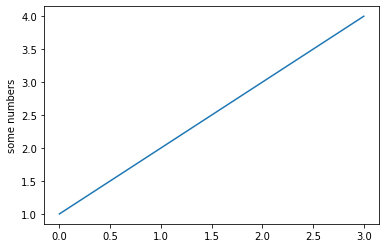

In [ ]:
#basic line
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

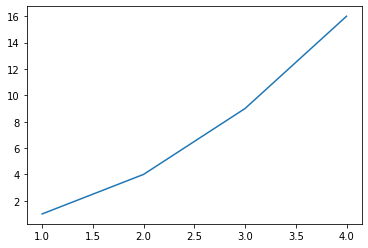

In [ ]:
plt.plot([1,2,3,4],[1,4,9,16])

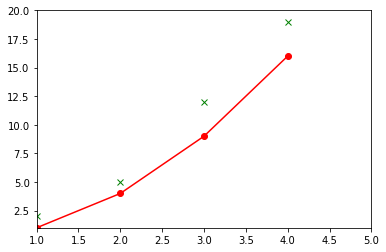

In [ ]:
plt.plot([1,2,3,4],[1,4,9,16], color = 'red', marker='o')
plt.plot([1,2,3,4],[2,5,12,19],'gx')
plt.axis([1,5,1,20])
plt.show()

In [ ]:
#Dotplot
#evenly sampled time at 200ms interval
t = np.arange(0.,5.,0.2)

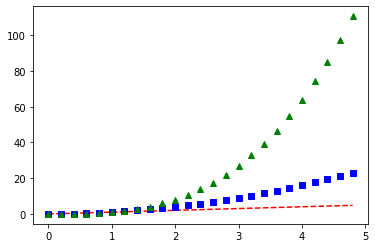

In [ ]:
plt.plot(t,t,'r--',t,t**2,'bs',t,t**3,'g^')
plt.show()

In [ ]:
?plt.plot

In [ ]:
#Scatter
data = {'a': np.arange(50),
        'c': np.random.randint(0,50,50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10*np.random.randn(50)
data['d'] = np.abs(data['d'])*100

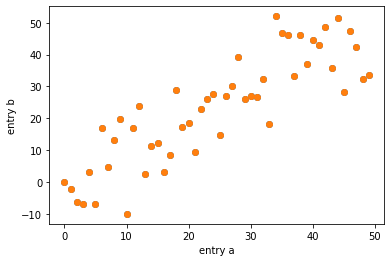

In [ ]:
plt.scatter(data['a'],data['b'])
plt.scatter('a','b',data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

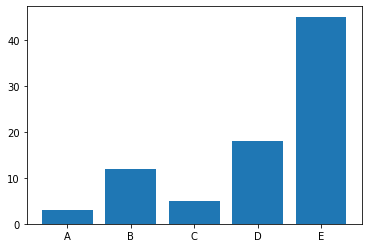

In [ ]:
#bar
height = [3,12,5,18,45]
bars = ['A','B','C','D','E']
Y_POS = np.arange(len(bars))
plt.bar(Y_POS, height)
plt.xticks(Y_POS,bars)
plt.show()

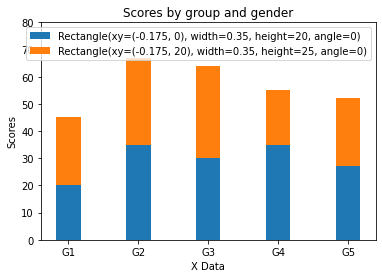

In [ ]:
#stacked bar
menMeans = [20,35,30,35,27]
N = len(menMeans)

womenMeans = [25,32,34,20,25]
#W = len(womenMeans)
#menstd = [2,3,4,1,2]
#womenstd =[3,5,2,3,3]
ind = np.arange(N)
width = 0.35

p1 = plt.bar(ind, menMeans, width)
p2 = plt.bar(ind, womenMeans, width, bottom=menMeans)

plt.xlabel('X Data')
plt.ylabel('Scores')

plt.title('Scores by group and gender')
plt.xticks(ind,('G1','G2','G3','G4','G5'))
plt.yticks(np.arange(0,81,10))
plt.legend((p1[0],p2[0],('Men','Women')))
plt.show()

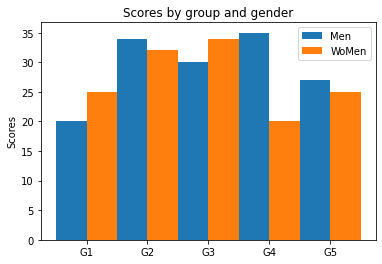

In [ ]:
#Bar-joint

labels = ['G1','G2','G3','G4','G5']
men_means = [20,34,30,35,27]
women_means=[25,32,34,20,25]

x = np.arange(len(labels)) # the label locations
width =0.5 #the width of the bars
#axes
fig, ax = plt.subplots()
rects1 = ax.bar(x -width/2, men_means, width,label='Men')
rects2 = ax.bar(x+ width/2, women_means, width,label='WoMen')

#Add some text for labels, title and custom x-axis ticks labels,etc.

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

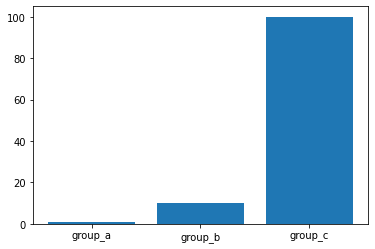

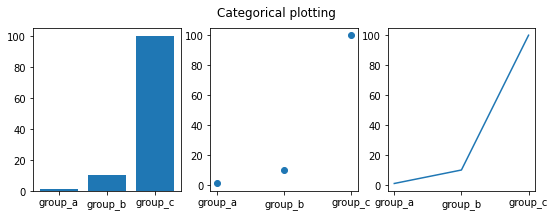

In [ ]:
names = ['group_a','group_b','group_c']
values =[1,10,100]
plt.bar(names,values)

plt.figure(figsize=(9,3))

plt.subplot(131)
plt.bar(names,values)
plt.subplot(132)
plt.scatter(names,values)
plt.subplot(133)
plt.plot(names,values)
plt.suptitle('Categorical plotting')
plt.show()


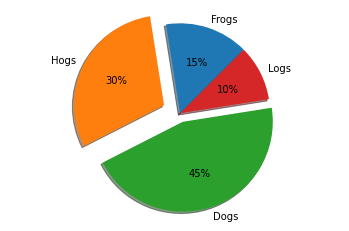

In [ ]:
#Pie chart, where the slices will be ordered and plotted counter clockwise:
labels = 'Frogs','Hogs','Dogs','Logs'
sizes=[15,30,45,10]
explode=(0,0.2,0.1,0) #Only "explode" the 2nd slice(i.e. "Hogs")

fig, ax = plt.subplots()
ax.pie(sizes, explode, labels, autopct='%1.0f%%', shadow=True, startangle=45)
ax.axis('equal') #Equal aspect ratio ensures that pie is drawn as a article.

plt.show()

In [ ]:
%matplotlib inline

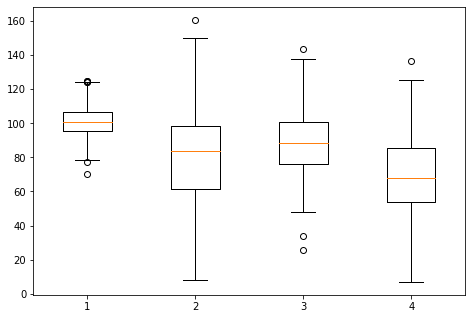

In [ ]:
#Boxplot

np.random.seed(10)
data1=np.random.normal(100,10,200)
data2=np.random.normal(80,30,200)
data3=np.random.normal(90,20,200)
data4=np.random.normal(70,25,200)

data = [data1,data2,data3,data4]
fig = plt.figure()
#Create all axes instance
ax = fig.add_axes([0,0,1,1])
#Create the boxplot
bp = ax.boxplot(data)
plt.show()

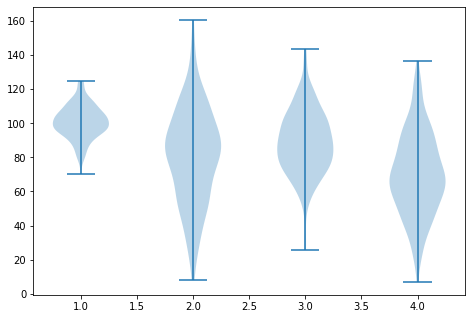

In [ ]:
#Violin

#Create a figure instance
fig = plt.figure()

#Create an axes instance
ax = fig.add_axes([0,0,1,1])

#Create the boxplot
bp = ax.violinplot(data)
plt.show()

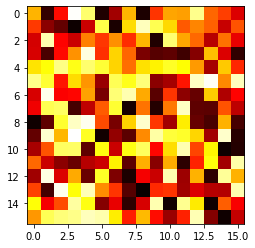

In [ ]:
#Heatmap

a=np.random.random((16,16))
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

In [ ]:
x=np.linspace(0, 2 * np.pi, 400)
y=np.sin(x**2)

Text(0.5, 1.0, 'A single plot')

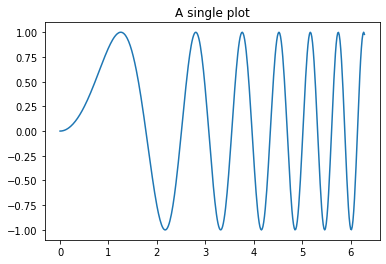

In [ ]:
fig, ax=plt.subplots()
ax.plot(x, y)
ax.set_title('A single plot')

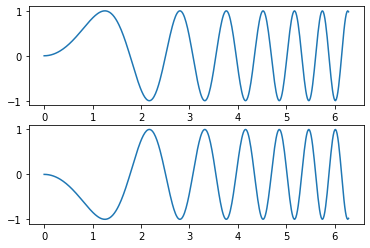

In [ ]:
fig, axs=plt.subplots(2)
ax.set_title('Vertically stacked subplot')
axs[0].plot(x,y)
axs[1].plot(x, -y)

Text(0, 0.5, 'Chart 1')

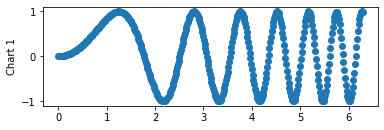

In [ ]:
plt.subplot(2,1,1)
plt.plot(x,y,'o ')
plt.ylabel('Chart 1')

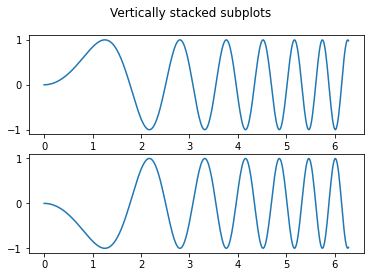

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle("Vertically stacked subplots")
ax1.plot(x, y)
ax2.plot(x, -y)

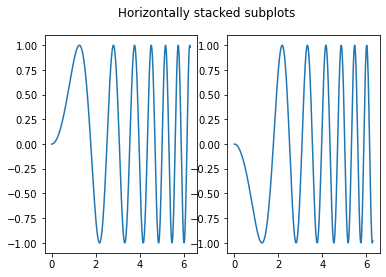

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle("Horizontally stacked subplots")
ax1.plot(x, y)
ax2.plot(x, -y)

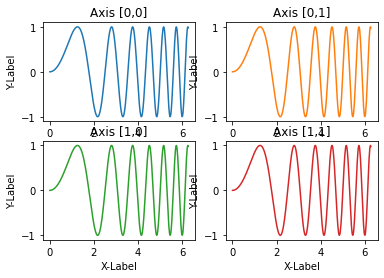

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0,0].plot(x, y)
axs[0,0].set_title('Axis [0,0]')
axs[0,1].plot(x, y, 'tab:orange')
axs[0,1].set_title('Axis [0,1]')
axs[1,0].plot(x, y, 'tab:green')
axs[1,0].set_title('Axis [1,0]')
axs[1,1].plot(x, y, 'tab:red')
axs[1,1].set_title('Axis [1,1]')

for ax in axs.flat:
  ax.set(xlabel='X-Label',ylabel='Y-Label')

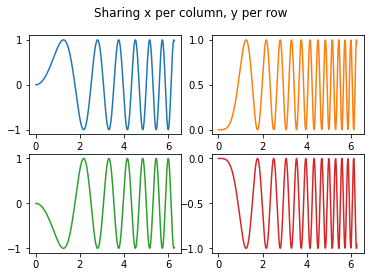

In [ ]:
#Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
  ax.label_outer()

#
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle("Sharing x per column, y per row")
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x, -y, 'tab:green')
ax4.plot(x, -y**2, 'tab:red')

Text(0.5, 0.98, 'Categorical plotting')

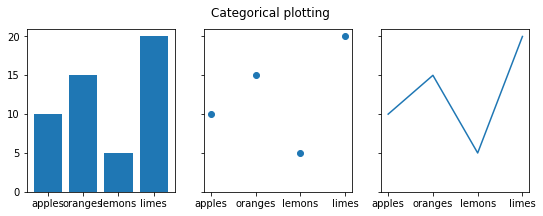

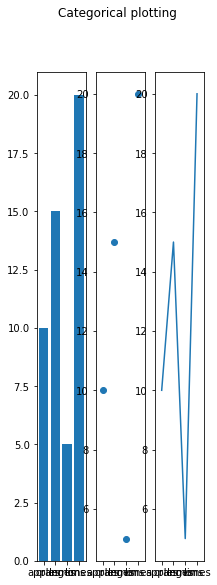

In [ ]:
data = {'apples':10, 'oranges':15, 'lemons':5, 'limes':20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9,3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical plotting')

fig, axs = plt.subplots(1, 3, figsize=(3,9), sharex=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical plotting')

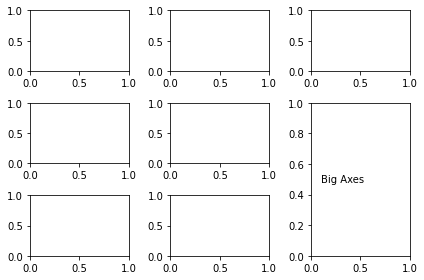

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=3)
gs=axs[1,2].get_gridspec()

#remove the underlying axes
for ax in axs[1:, -1]:
  ax.remove()
axbig=fig.add_subplot(gs[1:, -1])
axbig.annotate('Big Axes', (0.1, 0.5),
               xycoords='axes fraction', va='center')

fig.tight_layout()

plt.show()